In [ ]:
from pyspark.sql import SparkSession

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=a3262ab3e19e236833327fbacfdcfc4dd4399f7da4af697df9fb62dadcaf1c1d
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:

rdd1 = sc.textFile("sample.txt")


In [ ]:
# Print the first 5 lines from rdd1
for line in rdd1.take(5):
    print(line)

Hello world
Hello PySpark
Big data is fun
PySpark makes big data easy


In [ ]:
##3. Apply Transformations
rdd2 = rdd1.flatMap(lambda x : x.split(" "))


In [ ]:
for line in rdd2.take(5):
    print(line)

Hello
world
Hello
PySpark
Big


In [ ]:
rdd3 = rdd2.map(lambda word : (word,1))


In [ ]:
for line in rdd3.take(5):
    print(line)

('Hello', 1)
('world', 1)
('Hello', 1)
('PySpark', 1)
('Big', 1)


In [ ]:
rdd4 = rdd3.reduceByKey(lambda x,y : x+y)
#4. Action operation to run the DAG and get the final output
rdd4.collect() #- can lead to out of memory error

[('Hello', 2),
 ('world', 1),
 ('PySpark', 2),
 ('is', 1),
 ('Big', 1),
 ('data', 2),
 ('fun', 1),
 ('makes', 1),
 ('big', 1),
 ('easy', 1)]

# New section

In [ ]:
orders_rdd = sc.textFile("/content/part-00000")

In [ ]:
# prompt: how to view orders_rdd

for line in orders_rdd.take(5):
    print(line)


1,2013-07-25 00:00:00.0,11599,CLOSED
2,2013-07-25 00:00:00.0,256,PENDING_PAYMENT
3,2013-07-25 00:00:00.0,12111,COMPLETE
4,2013-07-25 00:00:00.0,8827,CLOSED
5,2013-07-25 00:00:00.0,11318,COMPLETE


In [ ]:
 #orders in each category
 mapped_rdd = orders_rdd.map(lambda x : (x.split(",")[3],1))

In [ ]:
for line in mapped_rdd.take(5):
    print(line)

('CLOSED', 1)
('PENDING_PAYMENT', 1)
('COMPLETE', 1)
('CLOSED', 1)
('COMPLETE', 1)


In [ ]:
#Transformation to aggregate the values based on key
reduced_rdd = mapped_rdd.reduceByKey(lambda x,y : x+y)

In [ ]:
for line in reduced_rdd.take(5):
    print(line)

('CLOSED', 7556)
('CANCELED', 1428)
('PENDING_PAYMENT', 15030)
('COMPLETE', 22899)
('PROCESSING', 8275)


In [ ]:
#Sort the values using sortBy
reduced_sorted = reduced_rdd.sortBy(lambda x : x[1], False)

In [ ]:
for line in reduced_sorted.take(5):
    print(line)

('COMPLETE', 22899)
('PENDING_PAYMENT', 15030)
('PROCESSING', 8275)
('PENDING', 7610)
('CLOSED', 7556)


In [ ]:
#Finding Premium Customers:
customers_mapped = orders_rdd.map(lambda x: (x.split(",")[2], 1))
customers_aggregated = customers_mapped.reduceByKey(lambda x, y: x + y)
customers_aggregated.sortBy(lambda x: x[1], False).take(10)


[('5897', 16),
 ('6316', 16),
 ('12431', 16),
 ('569', 16),
 ('4320', 15),
 ('221', 15),
 ('5624', 15),
 ('5283', 15),
 ('12284', 15),
 ('5654', 15)]

In [ ]:
#Distinct Customers Who Placed at Least 1 Order:
distinct_customers = orders_rdd.map(lambda x: x.split(",")[2]).distinct()
distinct_customers.count()


12405

In [ ]:
#Customers with the Maximum Number of CLOSED Orders:
filtered_orders = orders_rdd.filter(lambda x: x.split(",")[3] == 'CLOSED')
filtered_mapped = filtered_orders.map(lambda x: (x.split(",")[2], 1))
filtered_aggregated = filtered_mapped.reduceByKey(lambda x, y: x + y)
filtered_sorted = filtered_aggregated.sortBy(lambda x: x[1], False)


In [ ]:
for line in filtered_sorted.take(5):
    print(line)

('1833', 6)
('1363', 5)
('1687', 5)
('5493', 5)
('5011', 4)


Parallelize: How things work in the industry
Explanation:
Development Process:

Initial Development: Start by developing logic using small, sample data to meet the use case.
Testing on Small Dataset: Before running on a large dataset (e.g., several terabytes), test your logic on a smaller dataset to avoid wasting resources.
Scaling to Large Datasets: Once the logic is working as expected, you can apply the same code to larger datasets.
Use of parallelize():

Purpose: The parallelize() function is used to create an RDD (Resilient Distributed Dataset) from a small, local dataset for testing purposes.
Once you are satisfied with the results, you can scale up by replacing this small dataset with a larger, distributed dataset stored in a file.
Functional Programming with Spark:

Chaining Functions: One of the powerful features of Spark is the ability to chain multiple transformations in a functional programming style.

In [ ]:
words = ("big","Data","Is","SUPER","Interesting","BIG","data","IS","A","Trending","technology")

# Create an RDD using parallelize
words_rdd = spark.sparkContext.parallelize(words)

# Normalize the words to lowercase
words_normalized = words_rdd.map(lambda x: x.lower())

# View the normalized words
words_normalized.collect()

# Map each word to a tuple (word, 1)
mapped_words = words_normalized.map(lambda x: (x, 1))

# Reduce the tuples by key (word) to count the occurrences
aggregated_result = mapped_words.reduceByKey(lambda x, y: x + y)

# Collect and view the aggregated results
aggregated_result.collect()


Explanation of Each Step:
words_rdd = spark.sparkContext.parallelize(words):

This creates an RDD from a Python tuple words using the parallelize() function. The words are spread across different partitions and processed in parallel.
words_normalized = words_rdd.map(lambda x: x.lower()):

This maps each word in the RDD to its lowercase equivalent using the map() transformation and the lambda x: x.lower() function.
The result is a new RDD where every word is lowercase, ensuring case insensitivity during counting.
words_normalized.collect():

The collect() action retrieves the contents of the RDD to the driver program. In this case, it will show all the normalized words as a list.
mapped_words = words_normalized.map(lambda x: (x, 1)):

This maps each word to a tuple of the form (word, 1). The tuple represents each word paired with a count of 1, preparing the RDD for aggregation.
aggregated_result = mapped_words.reduceByKey(lambda x, y: x + y):

The reduceByKey() transformation groups the tuples by their keys (i.e., the words) and sums the values (i.e., the counts) using lambda x, y: x + y.
The result is an RDD where each word is paired with its total count of occurrences.
aggregated_result.collect():

Finally, the collect() action is used to retrieve the results, which will give a list of tuples where each word is paired with its frequency.

In [ ]:
#chaining functions
spark.sparkContext.parallelize(words)
    .map(lambda x: x.lower())
    .map(lambda x: (x, 1))
    .reduceByKey(lambda x, y: x + y)
    .collect()


Here, all the transformations (map(), reduceByKey()) are chained together for a more concise and functional programming style.
Alternatively, using result as a variable:

In [ ]:
result = spark.sparkContext.parallelize(words) \
    .map(lambda x: x.lower()) \
    .map(lambda x: (x, 1)) \
    .reduceByKey(lambda x, y: x + y) \
    .collect()


How to check the number of RDD partitions
The image explains how RDD partitions work in Spark, specifically in the context of data stored in HDFS (Hadoop Distributed File System). Here's a detailed breakdown of the key concepts:

File Size and HDFS Block Size:
Example File:

A file of 1GB (1024MB) is stored in HDFS.
HDFS Block Size:

By default, HDFS uses a block size of 128MB.
Number of Blocks in HDFS:

The number of blocks for a file in HDFS is calculated as

In [ ]:
Number of blocks = File size / Block size
                = 1024MB / 128MB
                = 8 blocks


This means the 1GB file will be split into 8 blocks in HDFS.
RDD Partitions:

In Spark, each block in HDFS typically corresponds to an RDD partition. Thus, the number of RDD partitions will be the same as the number of blocks in HDFS.
In this case, there would be 8 partitions for the 1GB file.
Example with Smaller Data:
In the example code provided:

In [ ]:
words = ("Big", "data", "is", "SUPER", "Interesting", "BIG", "data", "IS", "A", "Trending", "technology")
words_rdd = spark.sparkContext.parallelize(words)
words_rdd.getNumPartitions()


Here, the words_rdd is created from a small dataset (a list of words) using the parallelize() method.
The getNumPartitions() function is used to check how many partitions the RDD has.
Explanation of the Result:
The file size in this example is less than 128MB (because it's a small dataset of words), so if this data were stored in HDFS, it would fit into one block.
Therefore, in theory, there should be one RDD partition.
However, when the getNumPartitions() function is called, it shows 2 partitions, which might be confusing initially. This is because Spark uses certain properties to determine the minimum number of partitions, even for small datasets.

Key Properties Influencing Partitioning:
1. getNumPartitions():
This function returns the number of partitions for an RDD. In the example, it shows 2 partitions instead of 1.
2. defaultMinPartitions:
spark.SparkContext.defaultMinPartitions is a property that specifies the minimum number of partitions that Spark should use, even if the dataset is small.
By default, this value is set to 2, meaning that if the number of partitions is fewer than 2, Spark will default to using 2 partitions.
3. defaultParallelism:
spark.SparkContext.defaultParallelism is a property that determines the default level of parallelism in Spark.
This value indicates the number of tasks that can run in parallel, which often depends on the number of available cores or executors in the cluster.
When using parallelize(), if the number of partitions is not explicitly specified, Spark will use the default parallelism value to decide the number of partitions.

Summary:
HDFS Block Size and RDD Partitions: Generally, the number of RDD partitions is based on the number of blocks in HDFS, and each block typically corresponds to one RDD partition.
getNumPartitions(): You can use this function to check the number of partitions in an RDD.
Default Behavior in Spark: Spark's defaultMinPartitions is set to 2, so even if the dataset is small, Spark will ensure at least 2 partitions. For larger datasets, the number of partitions is determined by the block size and the defaultParallelism setting.

1. countByValue vs reduceByKey:
countByValue gives the same output as the combination of map and reduceByKey. However:
countByValue is an action, and the output is captured on a local node or gateway node. This implies that no further parallel processing can occur after countByValue.
reduceByKey is a transformation, which means parallel processing on the result can continue.
When to Use:
Use map + reduceByKey if you need further parallel processing.
Use countByValue if the final output doesn’t need further processing.
2. Categories of Transformations:
Narrow Transformation:

No data shuffling between different nodes occurs.
The transformed data stays on the same machine.
Examples: map, filter, flatmap.
Wide Transformation:

Data shuffling occurs, meaning the data is transferred to different machines for global aggregation.
Examples: reduceByKey, groupByKey.
Wide transformations involve data movement between nodes, which is a more expensive operation.
Notes:
If you need to perform further processing or transformations, prefer using map + reduceByKey.
If countByValue produces the final result without the need for further operations, it can be the better choice due to its simplicity.

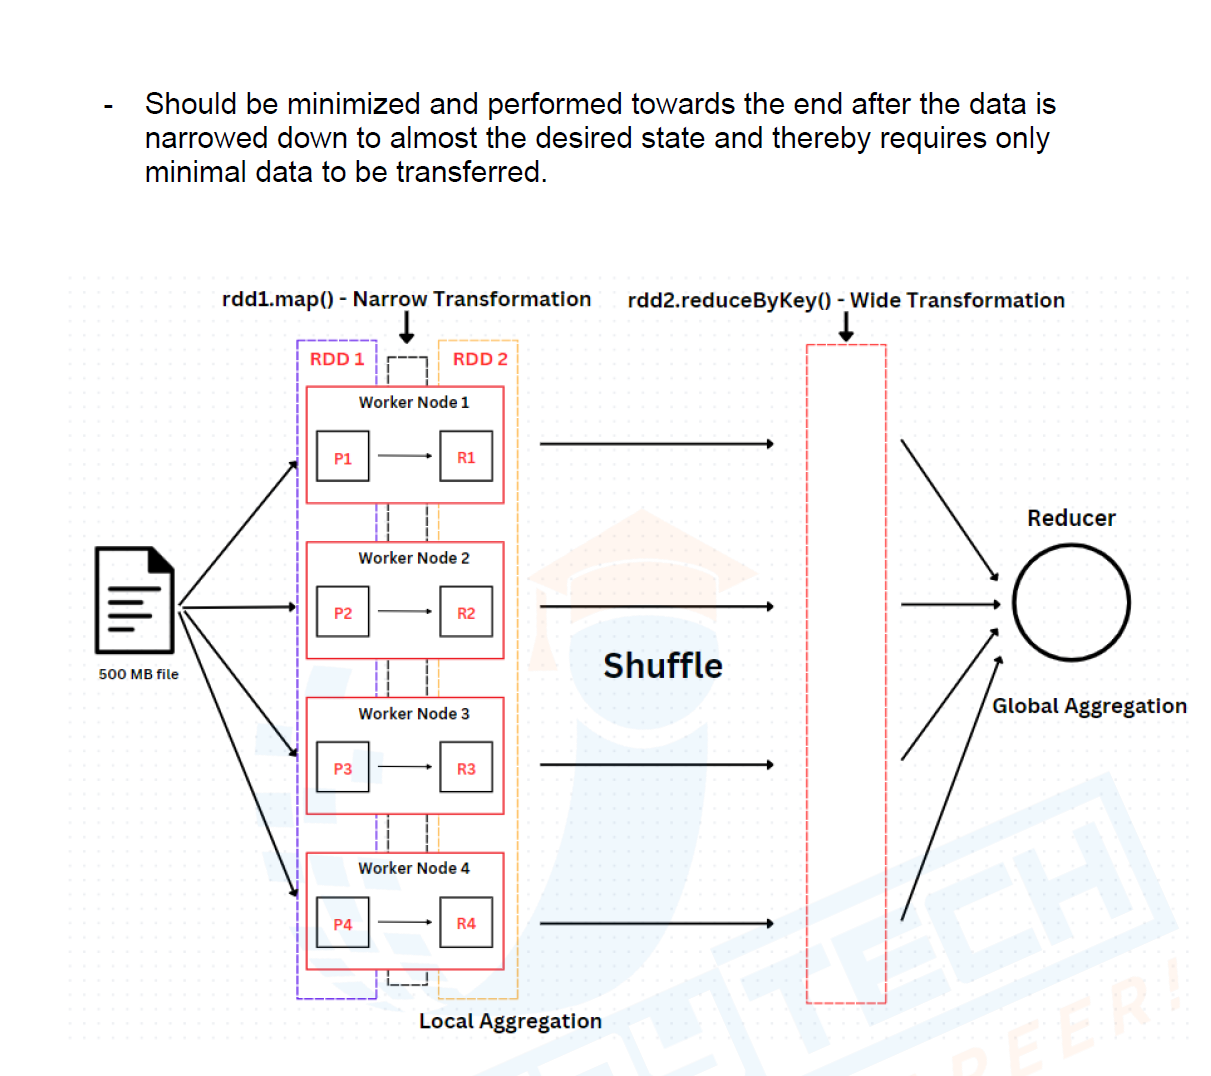

Explanation of the Diagram:
Narrow Transformation (map):

RDD1.map(): This is a narrow transformation, where each partition (P1, P2, P3, P4) is processed independently on different worker nodes.
The diagram shows Worker Nodes 1, 2, 3, 4 performing transformations on different partitions of the RDD (Resilient Distributed Dataset). Since no data needs to be transferred between nodes, this transformation is efficient and parallel across the cluster.
Local Aggregation:

Each node performs local aggregation (R1, R2, R3, R4) within the node. This part of the process ensures that the intermediate data is as compact as possible before it is sent across nodes for global aggregation.
Shuffle:

Wide Transformation: After the local aggregation, the data undergoes a shuffle. Shuffling happens during wide transformations like reduceByKey(). In this phase, data is moved between different nodes.
Shuffling is an expensive operation as it involves moving data across the network between worker nodes. This increases the processing time.
Global Aggregation:

Once the data is shuffled, the reducer performs the final global aggregation on the shuffled data. In this example, the wide transformation is RDD2.reduceByKey(), where the reduce operation aggregates data globally based on the key.
Key Takeaways:
Narrow Transformations like map() are efficient since they do not require data shuffling, and all operations are performed locally within the nodes.
Wide Transformations like reduceByKey() require a shuffle, where data is transferred between worker nodes, making them more expensive in terms of time and resources.
Minimize shuffling: It is generally recommended to minimize wide transformations and shuffling. It should only be performed once the data has been reduced to a manageable size.
Performance Optimization:
Shuffling should be minimized and performed as late as possible in the computation pipeline to reduce the amount of data being transferred across the network. In this way, wide transformations should come after most filtering and mapping operations to ensure less data is shuffled.

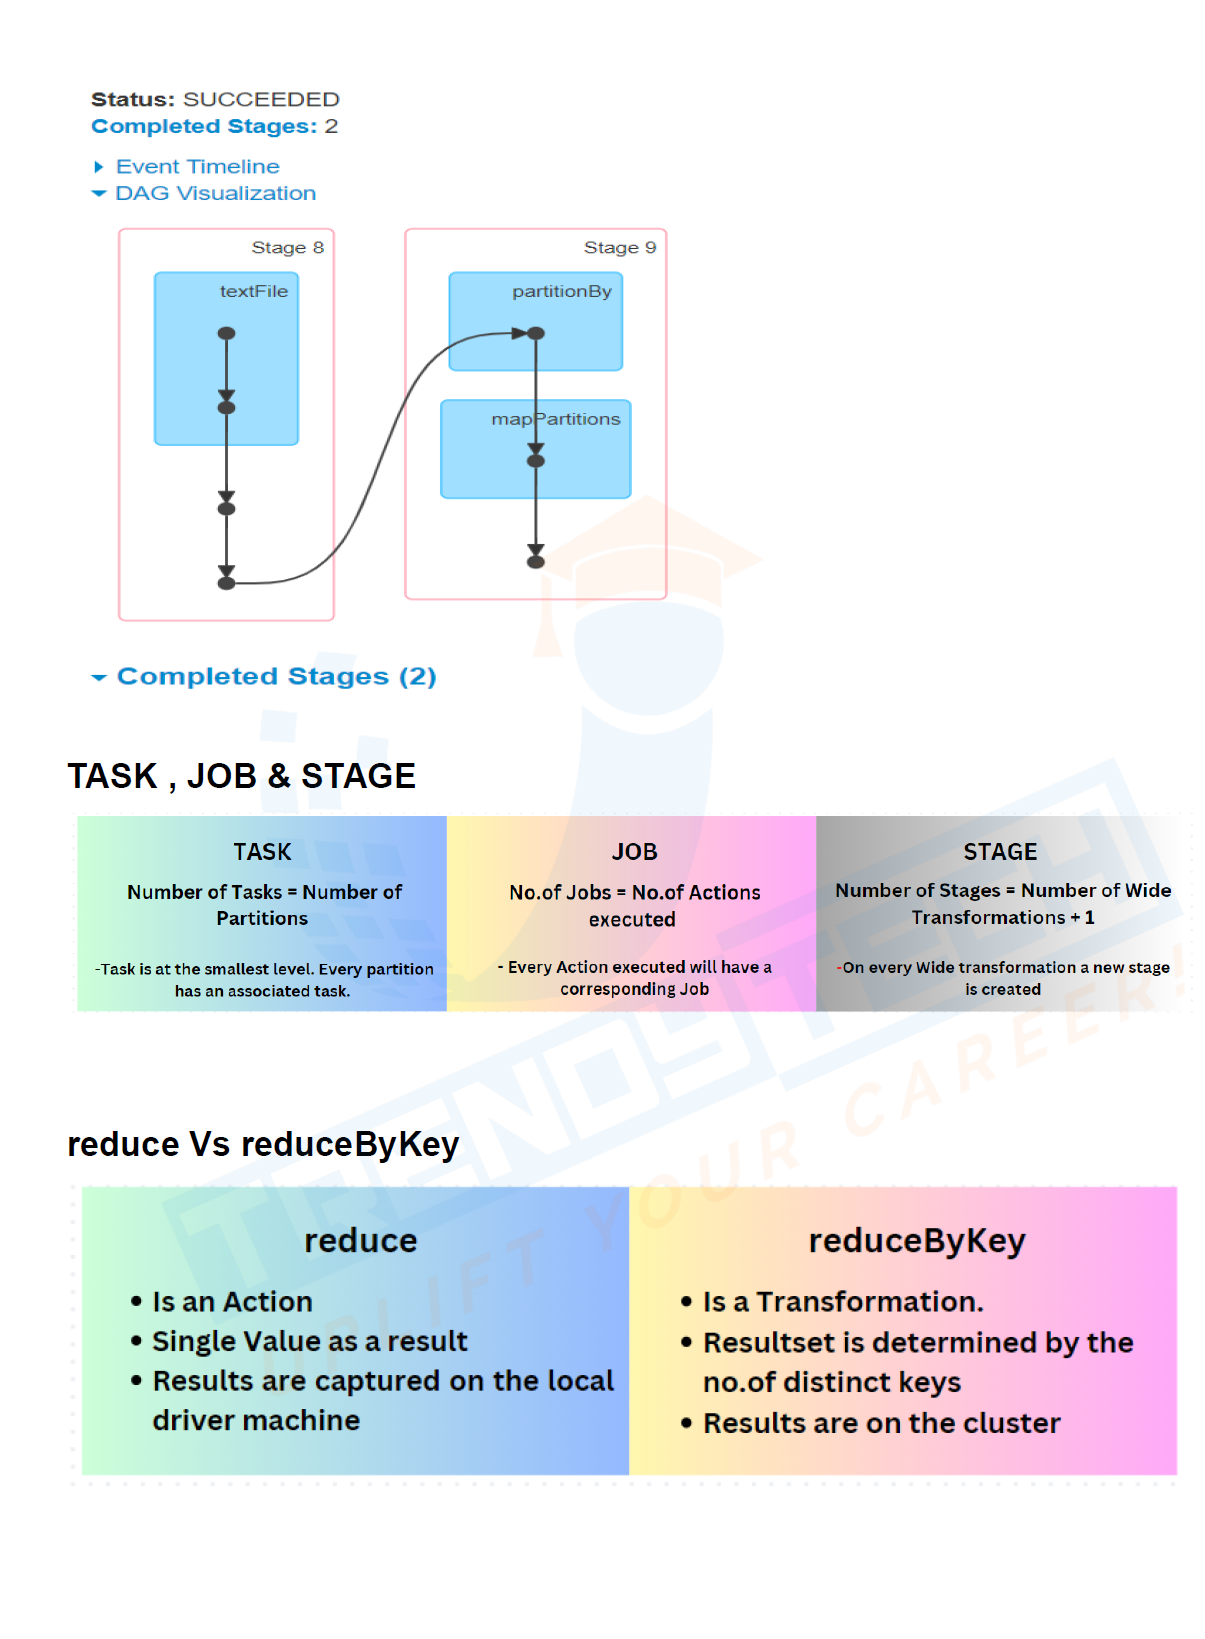

The image provides additional important concepts in Apache Spark, including the relationship between tasks, jobs, and stages as well as the difference between reduce and reduceByKey. Here's a summary and explanation:

Task, Job, and Stage
Task:

The number of tasks is equal to the number of partitions.
A task is the smallest unit of work in Spark, and each partition is assigned to a task.
Every partition of an RDD will have its own associated task.
Job:

The number of jobs equals the number of actions executed.
Every time an action (like count(), collect(), or saveAsTextFile()) is executed in a Spark application, it triggers a job.
Jobs are created when actions are called on RDDs.
Stage:

The number of stages is equal to the number of wide transformations plus 1.
A new stage is created every time a wide transformation (e.g., reduceByKey(), groupByKey()) is performed because it involves shuffling data between partitions.
Example:
In the illustration:
Stage 8 shows the transformation textFile which reads the input data.
Stage 9 contains the partitionBy and mapPartitions transformations. These indicate that a wide transformation (shuffling) took place, requiring a new stage.
reduce vs reduceByKey
reduce:
Type: Action
Result: Produces a single value as the result by aggregating all elements of the RDD.
Execution: The result is captured on the local driver machine.
reduceByKey:
Type: Transformation
Result: The result is determined by the number of distinct keys in the RDD. It aggregates values by key across partitions.
Execution: The results are processed on the cluster (across different nodes), and a wide transformation occurs, often involving shuffling data between nodes.
Key Points:
reduce is for simple reductions across the entire RDD (like summing all values in an RDD).
reduceByKey operates on key-value pairs, performing reduction for each unique key across different partitions.
Stages and Jobs are directly tied to how the transformations and actions are executed in Spark. Wide transformations like reduceByKey create new stages as they require data shuffling, while actions trigger jobs.


Here’s how the two images are linked:
1. Narrow vs Wide Transformations:
In the first image, we saw the difference between narrow transformations (e.g., map, filter, flatMap) and wide transformations (e.g., reduceByKey, groupByKey). Narrow transformations do not require data shuffling between nodes, while wide transformations involve data shuffling between partitions.
The second image continues this explanation by showing how wide transformations are split into different stages due to data shuffling. This creates a direct link between the concept of wide transformations (from the first image) and the stages created due to these transformations (explained in the second image).
2. Stages in Spark:
The first image explains how narrow transformations (like map) are executed locally within a worker node without data shuffling, and wide transformations (like reduceByKey) require shuffling.
The second image shows the stages created when you perform these transformations. Each stage represents a portion of the DAG (Directed Acyclic Graph) execution, and wide transformations that involve shuffling lead to the creation of new stages.
3. reduce vs reduceByKey:
In the first image, reduceByKey is used as an example of a wide transformation that involves shuffling data across partitions for global aggregation.
The second image dives deeper into the difference between reduce and reduceByKey, explaining that reduce is an action and operates locally on the driver machine (like countByValue in the first image), while reduceByKey is a transformation that requires data to be shuffled across nodes (a wide transformation, as described in the first image).
4. Stages and Jobs:
The first image provides an example of how shuffling creates new stages (wide transformation).
The second image clarifies the internal Spark architecture in terms of tasks, jobs, and stages, showing that wide transformations (like reduceByKey) lead to new stages and how tasks are assigned to partitions within stages. This is directly tied to the concept of wide transformations that we saw in the first image.

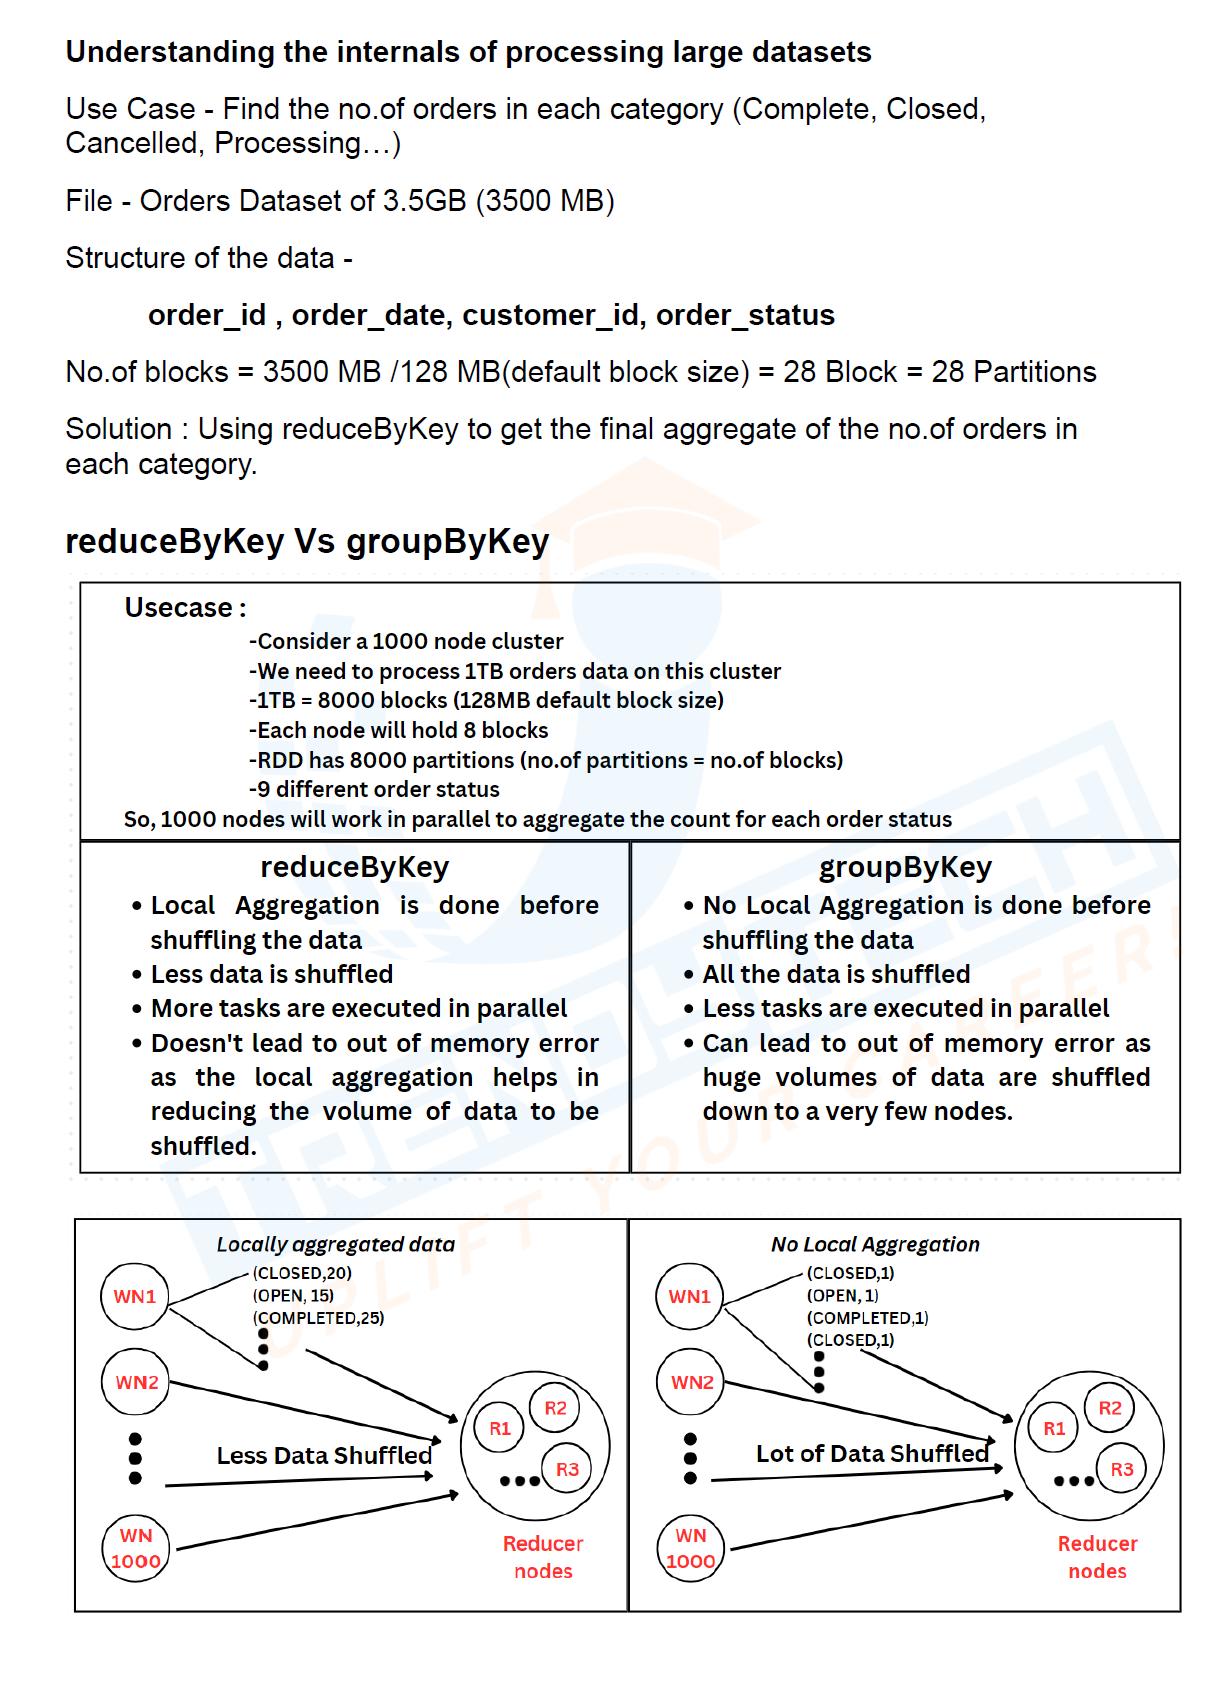

Understanding the Internals of Processing Large Datasets
Use Case: You want to find the number of orders in each category (e.g., Complete, Closed, Cancelled, Processing) from a 3.5GB dataset.

Dataset Structure: The file consists of columns like order_id, order_date, customer_id, and order_status.

**Block Size:**

The dataset size is 3.5GB (3500MB).
The default block size in Spark is 128MB, so the total number of blocks = 3500MB / 128MB = 28 blocks (or partitions).
Solution: You would use reduceByKey to calculate the final aggregate for the number of orders in each category, as this method minimizes the amount of data shuffling.

**reduceByKey vs groupByKey**
Use Case Explanation:
The example shows a 1000-node cluster processing 1TB of data.

1TB = 8000 blocks (since 1TB / 128MB = 8000 blocks).
Each node will handle 8 blocks.
The dataset contains 9 different order statuses, and the RDD has 8000 partitions (equal to the number of blocks).
Both reduceByKey and groupByKey can be used to aggregate the data, but they have significant differences in terms of performance and data shuffling.




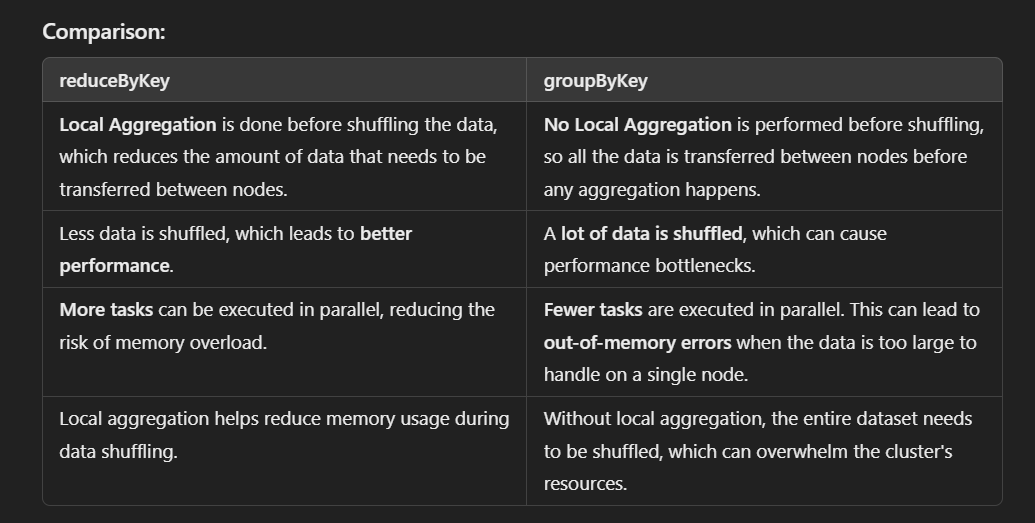

**reduceByKey:**

Each node performs local aggregation (e.g., aggregating counts of different
order statuses) before sending the data to reducer nodes.

Less data is shuffled because the intermediate data is already summarized on each worker node.

For example, worker nodes might aggregate local counts of CLOSED, OPEN, and COMPLETED statuses before sending them to the reducer.

**groupByKey:**

Without local aggregation, all data is shuffled to the reducer nodes, even if it is not necessary. This means that much larger amounts of data need to be transferred, leading to higher network and memory overhead.

For example, each worker node would send every individual record (e.g., one order in CLOSED, another in OPEN), resulting in a lot of data shuffling.

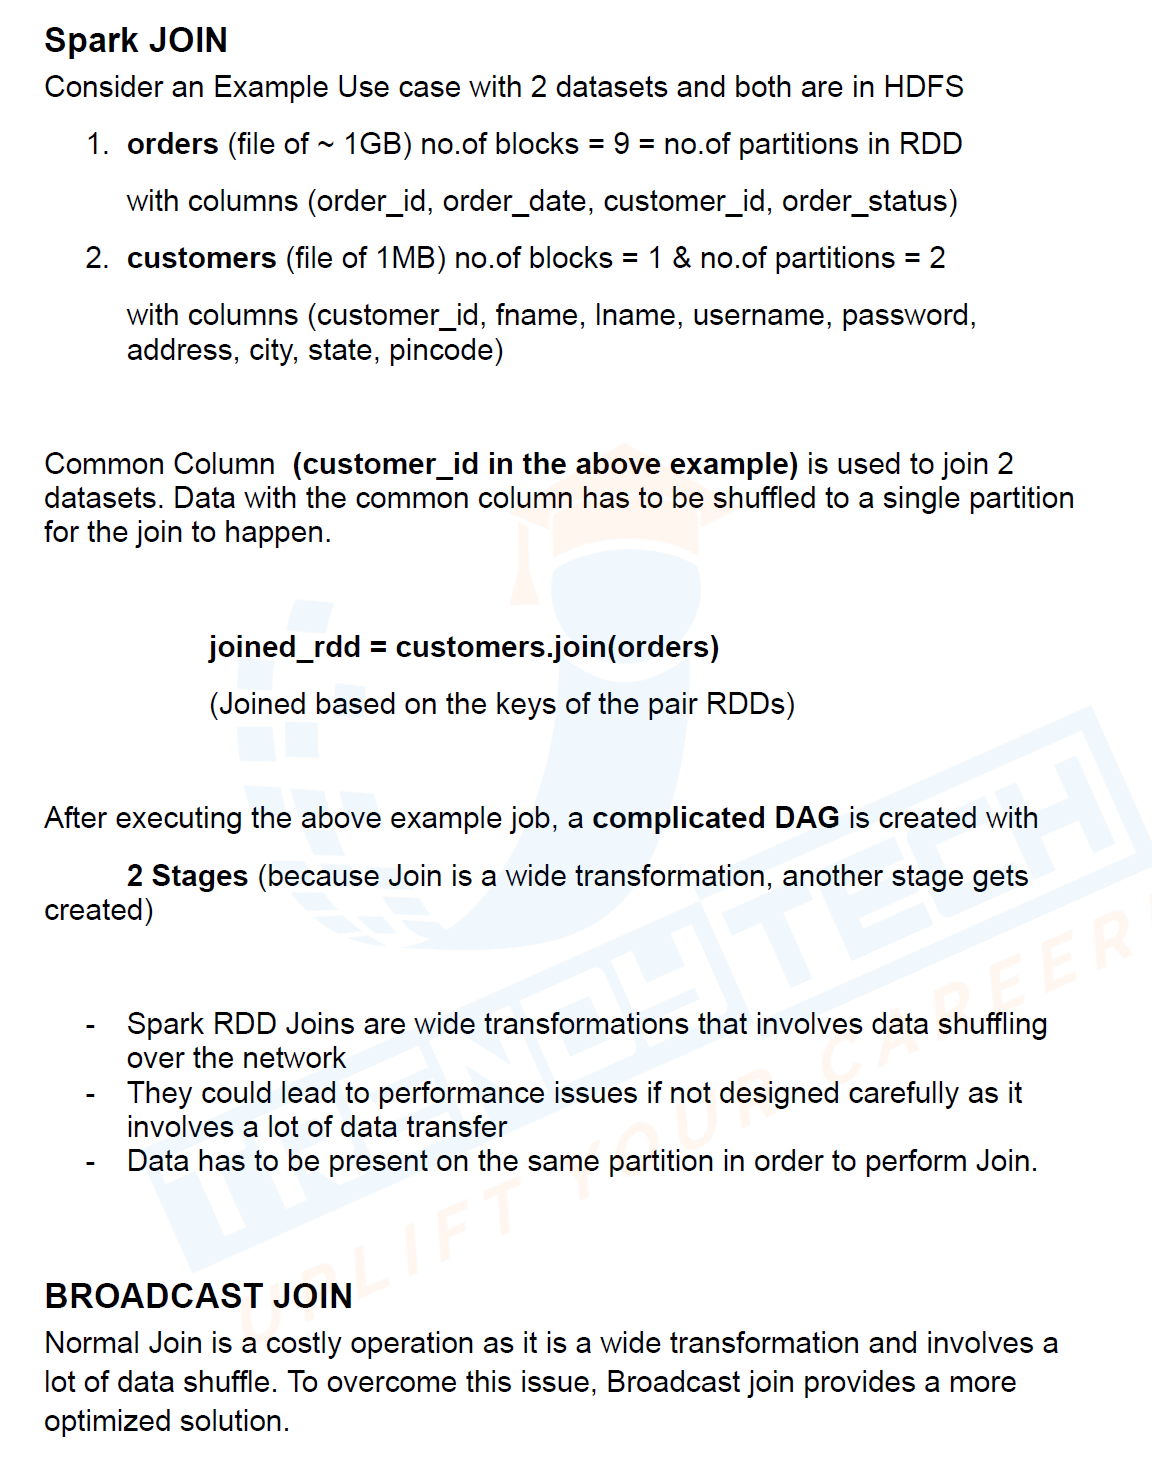

Spark Join

Example Use Case:

**Dataset 1: **

Orders dataset (~1GB, 9 blocks/partitions)
Columns: order_id, order_date, customer_id, order_status.

Dataset 2:
Customers dataset (1MB, 1 block but 2 partitions)

Columns: customer_id, fname, lname, username, address, city, state, pincode.

Common Column for Join:
The common column in this case is customer_id, which is used to join the two datasets.

For Spark to perform the join, the data with this common column has to be shuffled across the cluster and brought together into the same partition for matching.

Code Example:
scala

Copy code

**joined_rdd = customers.join(orders)**

This code joins the customers RDD with the orders RDD based on the common key customer_id.

**Performance Considerations:**
Wide Transformation: A join operation in Spark is a wide transformation, meaning it involves data shuffling across nodes. This makes it expensive in terms of time and resources.

**Complicated DAG**: After running the join operation, Spark generates a Directed Acyclic Graph (DAG) with 2 stages:

The first stage shuffles the data so that the matching keys (in this case, customer_id) from both datasets are on the same partition.

The second stage performs the join once the data is correctly shuffled.
Key Points about Spark Joins:

**Wide Transformation**: Spark RDD Joins are wide transformations, which require data to be shuffled across the network.

Performance Issues: If not carefully optimized, Spark joins can cause performance issues due to the large amount of data transfer across partitions.

Same Partition: To perform a join, data with the common key must be on the same partition, which causes the need for shuffling.

Broadcast Join
Problem with Normal Joins:
Normal Join is costly because it’s a wide transformation that involves a large amount of data shuffling. This is especially problematic when one of the datasets (like customers in the example) is small, but the other dataset (orders) is large.

Broadcast Join:
Broadcast Join is an optimization technique in Spark that addresses the inefficiency of a standard join by reducing data shuffling.
Instead of shuffling both datasets, Spark broadcasts the smaller dataset (e.g., customers in this case) to all worker nodes.

This way, each node can perform the join locally without needing to shuffle data between nodes.

When to Use Broadcast Join:
Small Dataset: When one of the datasets is small enough to fit into the memory of all worker nodes, Broadcast Join is an efficient solution.
Optimized Solution: By broadcasting the smaller dataset to all nodes, Spark avoids the expensive shuffle operation, reducing execution time and resource consumption.

How This Image Connects to Previous Images:
Wide Transformation and Shuffling:

Similar to how reduceByKey and groupByKey involve shuffling, joins in Spark also involve shuffling because they require data to be aligned based on keys (customer_id in this case). This is another example of a wide transformation.
The concept of stages in Spark (explained in previous images) applies here. As the join operation requires shuffling, it leads to the creation of multiple stages.

Broadcast Join as an Optimization:

In earlier images, we discussed the importance of minimizing shuffling to improve performance. Broadcast Join is one way to avoid unnecessary shuffling when joining a large dataset with a small one.
This is similar to how reduceByKey minimizes shuffling by performing local aggregation.

Joins and Stages:

Joins, like reduceByKey, create multiple stages in Spark due to the need for data shuffling. As described earlier, narrow transformations like map or filter don't require shuffling, while wide transformations like joins or reduceByKey create new stages and involve network-intensive operations.

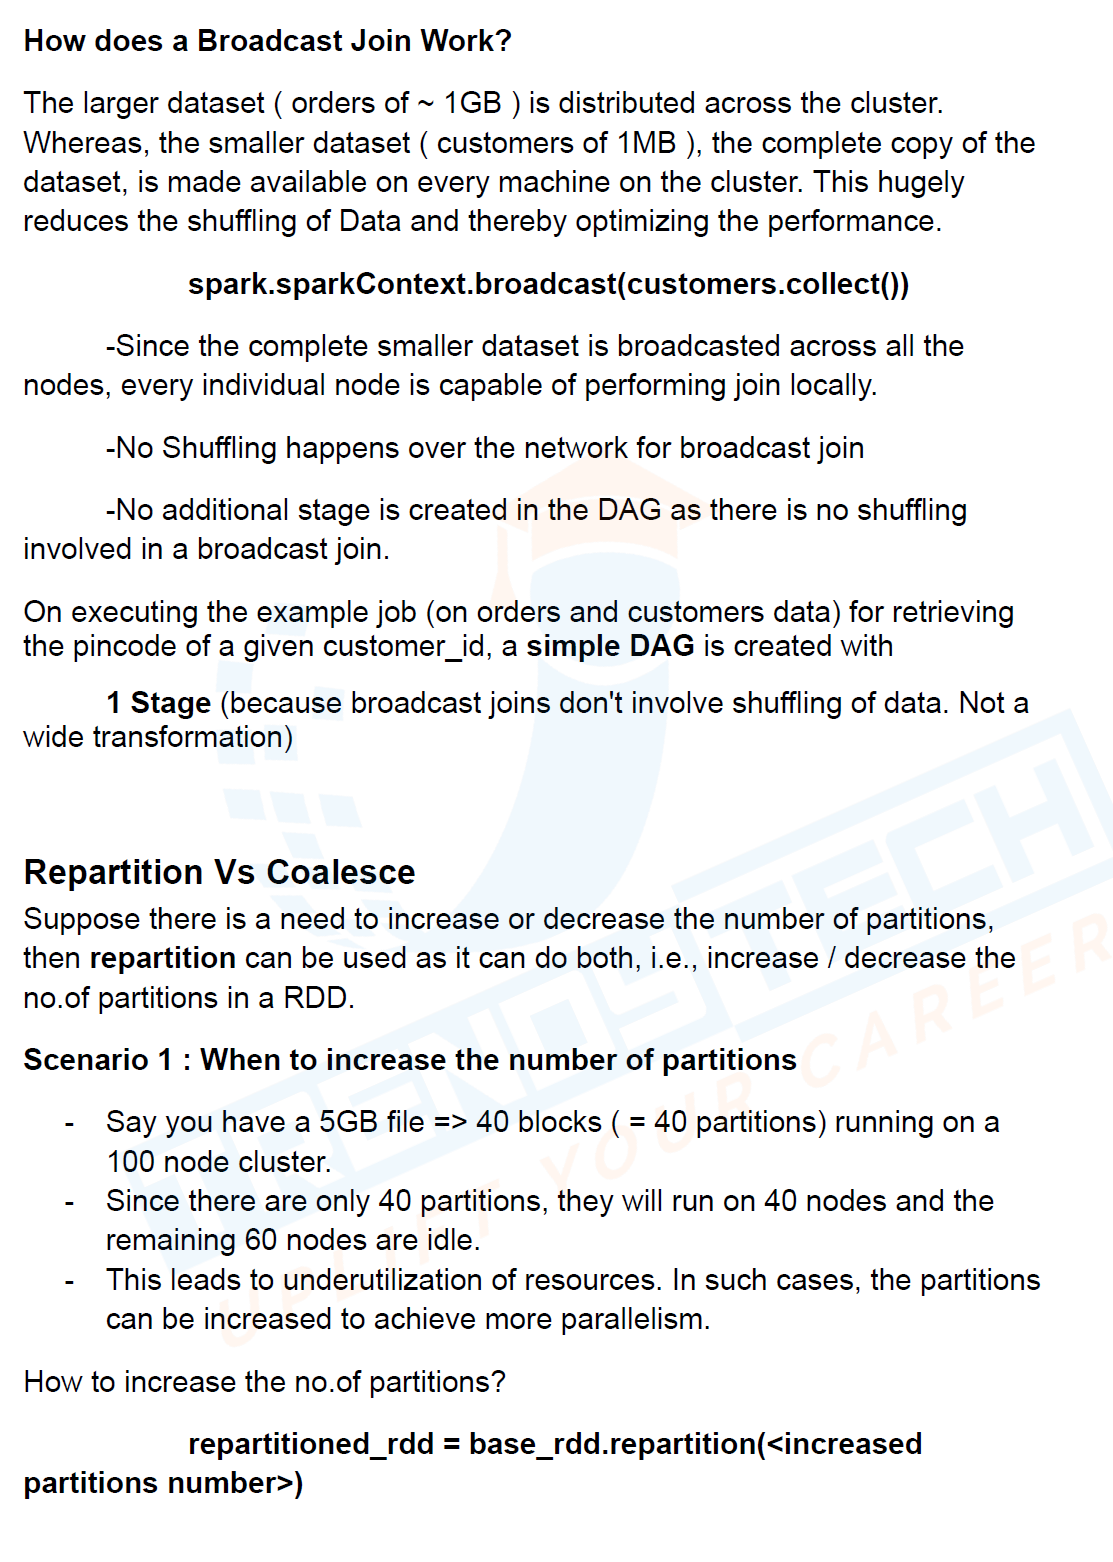

1. How Does a Broadcast Join Work?
Explanation:
In the previous image, we discussed how Broadcast Join can be used to optimize joins when one dataset is significantly smaller than the other.
In this case:
The larger dataset (orders of ~1GB) is distributed across the cluster.
The smaller dataset (customers of 1MB) is broadcasted to all worker nodes.
Code Example:
scala
Copy code
spark.sparkContext.broadcast(customers.collect())
customers.collect(): The customers dataset is collected and broadcasted across the cluster, making it available to all nodes.
How it Works:
No Shuffling: Since the smaller dataset is broadcasted, each node can perform the join locally, eliminating the need to shuffle data across the network.
No Additional Stage: Unlike normal joins (which require data shuffling and create multiple stages), a broadcast join does not add any additional stage to the DAG (Directed Acyclic Graph). This simplifies the DAG.
Outcome:
A simple DAG with only 1 stage is created because there’s no need to shuffle data across nodes. This makes the broadcast join a much more efficient solution, especially for large-scale datasets with a small dimension table.
2. Repartition vs Coalesce
Repartition:
Repartition is used to increase or decrease the number of partitions in an RDD or DataFrame.
Increasing the number of partitions can help achieve more parallelism, while decreasing the number of partitions can help reduce resource usage.
Scenario 1: When to Increase the Number of Partitions
Imagine a 5GB file with 40 blocks (each block is ~128MB), meaning it is distributed across 40 partitions.
If this file is running on a 100-node cluster, it will only use 40 of the 100 nodes, underutilizing the remaining 60 nodes.
Solution:
To increase parallelism and ensure that more nodes are utilized, the number of partitions can be increased.
This is done using the repartition method:
scala
Copy code
repartitioned_rdd = base_rdd.repartition(<increased number of partitions>)
The number of partitions is increased to better utilize the cluster's resources, allowing more nodes to process the data in parallel.
How This Image Connects to Previous Ones:
Broadcast Join Optimization:

This image continues the discussion from the previous image about Broadcast Joins, showing how they can drastically improve performance by avoiding shuffling. Since shuffling is a key challenge in wide transformations (discussed in earlier images), using a broadcast join when one dataset is small optimizes the operation significantly.
Stages and DAG:

In the earlier images, we discussed how wide transformations like joins create multiple stages. This image highlights that a broadcast join simplifies the DAG and reduces the number of stages to just one, making it more efficient.
Partitioning:

The concept of repartitioning ties into earlier discussions about tasks and parallelism in Spark. Increasing or decreasing the number of partitions affects how tasks are distributed across the cluster, which can improve or reduce performance based on the use case.

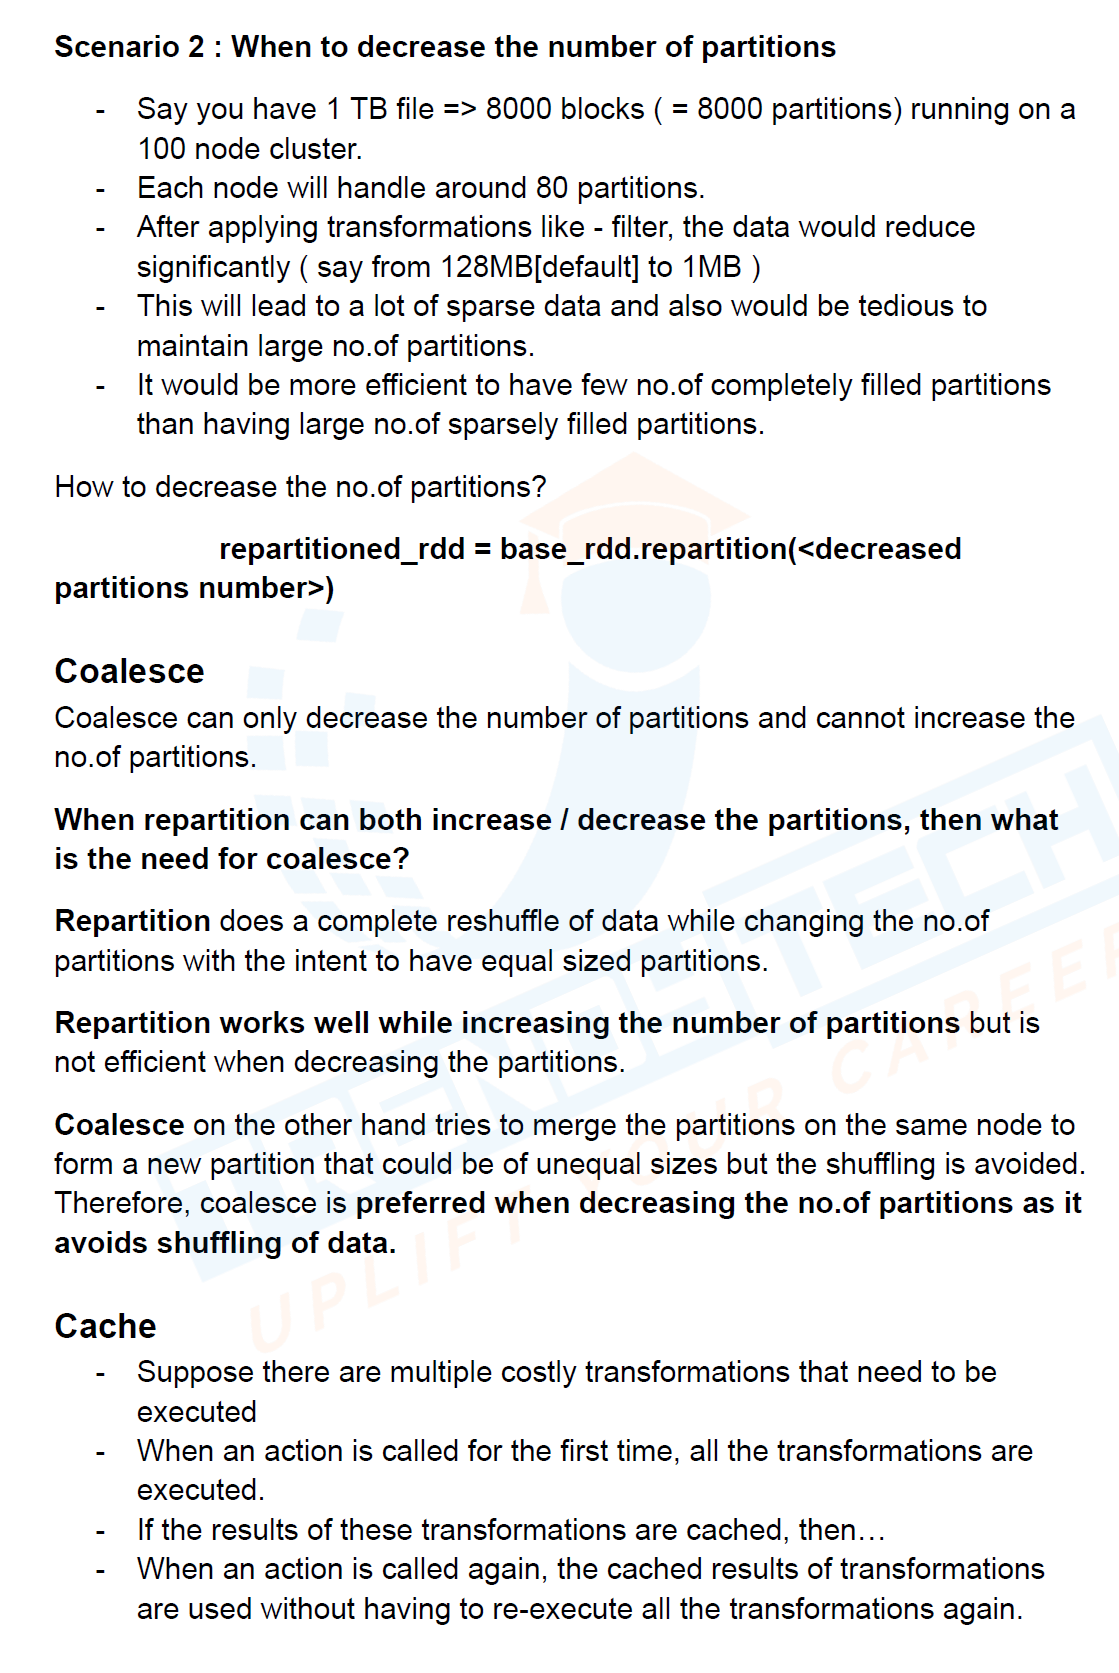

The new image explains Scenario 2 for when to decrease the number of partitions, the difference between Repartition and Coalesce, and introduces Cache in Apache Spark. Let’s break them down:

Scenario 2: When to Decrease the Number of Partitions
Example:
1TB file divided into 8000 blocks/partitions, running on a 100-node cluster.
After transformations (like filtering), the data size may reduce significantly (from 128MB to 1MB per partition), leaving many sparsely filled partitions.
Maintaining many empty or near-empty partitions would be inefficient, so it's better to reduce the number of partitions.
How to Decrease the Number of Partitions:
scala
Copy code
repartitioned_rdd = base_rdd.repartition(<decreased number of partitions>)
The repartition function can both increase and decrease the number of partitions, but this comes with certain trade-offs (explained below in Coalesce).
Coalesce vs Repartition
Coalesce can only decrease the number of partitions and cannot increase them.
Why Use Coalesce When Repartition Can Increase and Decrease Partitions?
Repartition:

Repartition does a complete shuffle of data across the network, ensuring that all partitions are of equal size.
This method works well when increasing partitions because it redistributes the data evenly.
However, when decreasing the number of partitions, repartitioning can be inefficient due to the heavy data shuffle involved.
Coalesce:

Coalesce reduces the number of partitions without a full shuffle. It tries to merge partitions that are already on the same node into fewer partitions.
As a result, coalesce avoids the costly shuffling of data and is more efficient when you only need to reduce partitions.
Coalesce is preferred when decreasing the number of partitions because it minimizes network and resource overhead compared to repartitioning.
Cache
Use Case for Cache:
If you have multiple costly transformations (such as filters, maps, joins) that need to be executed repeatedly, caching can help save execution time.
How Cache Works:
The first time an action (like count(), collect()) is called on an RDD or DataFrame, the transformations are executed.
If the results are cached, they are stored in memory (or disk), and subsequent actions use the cached results instead of re-executing the transformations.
This significantly improves performance when the same RDD is used multiple times in an application.
When to Use Cache:
Repeated Actions: Cache is useful when you need to perform multiple actions on the same dataset, and re-running the transformations each time would be costly.
How This Image Links to the Previous Ones:
Repartition and Coalesce:

In previous images, we discussed the importance of partitioning for tasks and parallelism. Here, repartition helps increase or decrease partitions based on the workload, while coalesce provides a more efficient way to reduce partitions without shuffling.
In a similar way to Broadcast Joins, coalesce minimizes data shuffling across the network to improve performance.
Partitioning and Shuffling:

Both repartition and coalesce affect how data is distributed across partitions. Earlier images highlighted how wide transformations like joins and reduceByKey trigger shuffling across partitions. Here, coalesce is preferred to reduce partitions without triggering unnecessary shuffling.
Cache:

Cache ties back to earlier discussions about how Spark optimizes transformations and actions. By caching intermediate results, Spark can avoid re-executing costly transformations, leading to faster and more efficient jobs.